In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2, os

Using TensorFlow backend.


In [2]:
IMG_HELP_PATH = '/Users/shankar/dev/code/ds/studies/data_science/dlcv/sb/c07-first_image_classifier'
import os
import sys
sys.path.append(os.path.abspath(IMG_HELP_PATH))
from pyimagesearch.nn.conv import LeNet

In [3]:
DATASET = "../datasets/SMILEsmileD"
MODEL = "output/lenet.hdf5"

In [4]:
data = []
labels = []

In [5]:
imagePaths = list(paths.list_images(DATASET))
imagePaths[:10]

['../datasets/SMILEsmileD/SMILEs/positives/positives7/63.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/823.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/3578.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/10447.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/2100.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/7078.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/9055.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/189.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/11995.jpg',
 '../datasets/SMILEsmileD/SMILEs/positives/positives7/2672.jpg']

In [6]:
# Loop over the input images
for imagePath in sorted(imagePaths):
    # Load the image, preprocess it and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = imutils.resize(image, width=28)
    image = img_to_array(image)
    data.append(image)
    
    # Extrac the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-3]
    label = "smiling" if label == "positives" else "not_smiling"
    labels.append(label)

In [7]:
# Scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Account for skew in the labeled data
le = LabelEncoder().fit(labels)
labels = np_utils.to_categorical(le.transform(labels), 2)

In [8]:
# Account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

classWeight

array([ 1.        ,  2.56775068])

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [10]:
model = LeNet.build(width=28, height=28, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), class_weight=classWeight, batch_size=64, epochs=15, verbose=1)

Train on 10532 samples, validate on 2633 samples
Epoch 1/15
10532/10532 [==============================] - 13s 1ms/step - loss: 0.3893 - acc: 0.8213 - val_loss: 0.2878 - val_acc: 0.8769
Epoch 2/15
10532/10532 [==============================] - 12s 1ms/step - loss: 0.2696 - acc: 0.8907 - val_loss: 0.3257 - val_acc: 0.8618
Epoch 3/15
10532/10532 [==============================] - 13s 1ms/step - loss: 0.2400 - acc: 0.9025 - val_loss: 0.2650 - val_acc: 0.8880
Epoch 4/15
10532/10532 [==============================] - 12s 1ms/step - loss: 0.2159 - acc: 0.9144 - val_loss: 0.2421 - val_acc: 0.9054
Epoch 5/15
10532/10532 [==============================] - 12s 1ms/step - loss: 0.1990 - acc: 0.9232 - val_loss: 0.2394 - val_acc: 0.9039
Epoch 6/15
10532/10532 [==============================] - 12s 1ms/step - loss: 0.1850 - acc: 0.9276 - val_loss: 0.2385 - val_acc: 0.9062
Epoch 7/15
10532/10532 [==============================] - 13s 1ms/step - loss: 0.1639 - acc: 0.9389 - val_loss: 0.2377 - val_acc:

In [12]:
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))

             precision    recall  f1-score   support

not_smiling       0.94      0.94      0.94      1895
    smiling       0.84      0.84      0.84       738

avg / total       0.91      0.91      0.91      2633



In [13]:
model.save(MODEL)

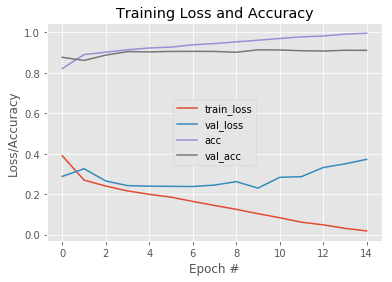

In [14]:
# plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["acc"], label="acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()